In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import numpy as np
import os
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from matplotlib.animation import FuncAnimation

In [88]:
base_dir = "/Users/robertstein/ztfimages/543/"
path = os.path.join(base_dir, "ztf_20191002147454_000543_zr_c14_o_q4_sciimg.fits")

In [89]:
from astropy.io import fits
fits.info(path)

Filename: /Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c14_o_q4_sciimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  4             1 PrimaryHDU     268   (3072, 3080)   float32   


In [90]:
image_data = fits.getdata(path, ext=0)
print(fits.getheader(path, ext=0))

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                 3072                                                  NAXIS2  =                 3080                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.99.5  June 17, 2019' / Robotic software version                    FITSSOFT= '0.99.5  June 17, 2019' / FITS software version                       INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

3.2079744


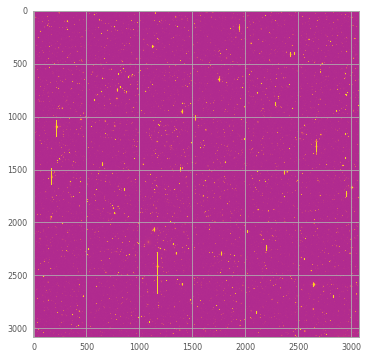

In [91]:
plt.figure()
z = np.log10(image_data)
vmax = 5.0
z[z > vmax] = np.median(z)
print(np.median(z))
plt.imshow(z, cmap='plasma', vmin=2.0, vmax=vmax)
# plt.colorbar()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 314.3095735735  14.17539260244  
CRPIX : 1536.5  1540.5  
CD1_1 CD1_2  : -0.0002812307915868  -2.615828144894e-06  
CD2_1 CD2_2  : 2.536676763984e-06  -0.0002812183286746  
NAXIS : 3072  3080
3080
Frames 50 6.25
6.25


(31.59887036148143, 2842.7835148504773)

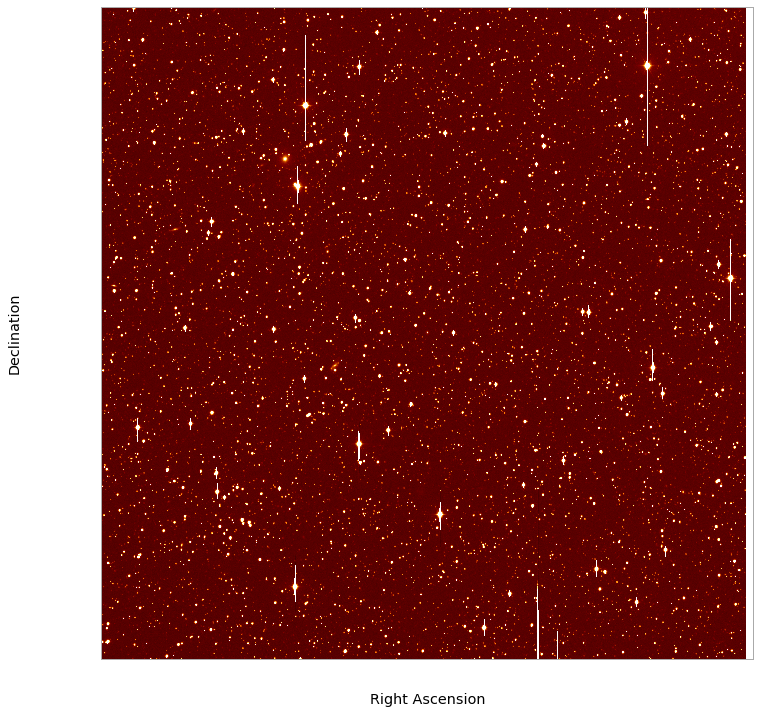

In [241]:
big_fontsize = 20
fig_width = 12

hdu = fits.open(path)[0]
wcs = WCS(hdu.header)
plt.figure(figsize=(fig_width, fig_width))
ax = plt.subplot(projection=wcs)
print(wcs)
print(len(z))
ax.imshow(np.log10(hdu.data), vmin=3.1, vmax=3.7, cmap='afmhot')
ax.grid(color='white', ls='solid')
# ax.invert_yaxis()
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')
ax.tick_params(axis='both', which='major', colors="white", labelsize=big_fontsize)

lon, lat = wcs.all_world2pix(314.262416, 14.204515, 0)

width = 3072./2.

# def get_range(n_zoom):
    
#     width_n = width/n_zoom
    
#     return (lon-width_n, lon+width_n), (lat-width_n, lat+width_n)

scale = frames/8

print("Frames", frames, scale)

def get_range(n_zoom):
    
    width_n = width * 2 ** -(n_zoom/scale)
    
    return (lon-width_n, lon+width_n), (lat-width_n, lat+width_n)

print(scale)

# xlim = 

xlim, ylim = get_range(0.8)
plt.xlim(xlim)
plt.ylim(ylim)

# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

# plt.xlim(1000., 3071.5)

# plt.xlim(310.14, 310.49)
# plt.ylim(0.5,1.5)

Frames 300 37.5


<Figure size 864x1296 with 0 Axes>

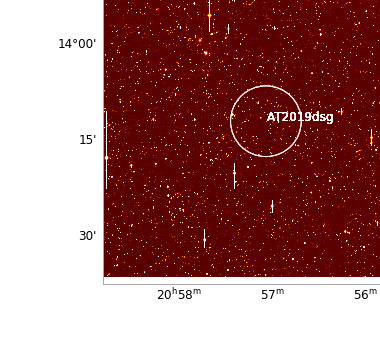

In [256]:
frames = 300
plt.figure(figsize=(fig_width, 1.5*fig_width))

hdu = fits.open(path)[0]
wcs = WCS(hdu.header)

lon, lat = wcs.all_world2pix(314.262416, 14.204515, 0)

width = 3072./2.

scale = frames/8

print("Frames", frames, scale)

def get_range(n_zoom):
    
    width_n = width * 2 ** -(n_zoom/scale)
        
    return (lon-width_n, lon+width_n), (lat-width_n, lat+width_n)

fig = plt.figure()

ax = plt.subplot(projection=wcs)

ax.imshow(np.log10(hdu.data), vmin=3.1, vmax=3.7, cmap='afmhot')
ax.grid(color='white', ls='solid')

ax.set_ylabel('Declination', color="white")
ax.set_xlabel('Right Ascension', color="white")

    # ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=12, colors="white")

xlim, ylim = get_range(1.)
plt.xlim(xlim)
plt.ylim(ylim)
# xlim = 



def update_plot(j):
    
    if j < 0.75*frames:

        xlim, ylim = get_range(j+1)
        plt.xlim(xlim)
        plt.ylim(ylim)
        
    elif j < 0.8*frames:
        ax.set_ylabel('Declination', fontsize=big_fontsize)
        ax.set_xlabel('Right Ascension', fontsize=big_fontsize)
        ax.tick_params(axis='both', which='major', labelsize=12, colors="black")
        plt.scatter(lon, lat, s=5000, facecolors='none', edgecolors='white', alpha=0.2)
        
    else:
        plt.annotate("AT2019dsg", (lon+7, lat+7), color="white", alpha=0.2)  


ani = FuncAnimation(fig, update_plot, frames=frames,
                    blit=False, interval=30)
ani.save("plots/zoom_through_images.mp4")

Frames 800 100.0


<Figure size 1152x648 with 0 Axes>

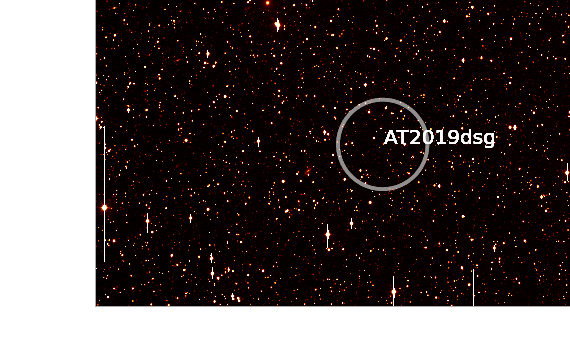

In [258]:
frames = 800
plt.figure(figsize=(16, 9))

hdu = fits.open(path)[0]
wcs = WCS(hdu.header)

lon, lat = wcs.all_world2pix(314.262416, 14.204515, 0)

width = 3072./2.

scale = frames/8

print("Frames", frames, scale)

def get_range(n_zoom):
    
    width_x = width * 2 ** -(n_zoom/scale)
    
    width_y = width_x * 9./16.
        
    return (lon-width_x, lon+width_x), (lat-width_y, lat+width_y)

fig = plt.figure()

ax = plt.subplot(projection=wcs)

ax.imshow(np.log10(hdu.data), vmin=3.2, vmax=3.7, cmap='afmhot')
ax.grid(color='white', ls='solid')

ax.set_ylabel('Declination', color="white")
ax.set_xlabel('Right Ascension', color="white")

    # ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=12, colors="white")

xlim, ylim = get_range(1.)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
# xlim = 



def update_plot(j):
    
    if j < 0.75*frames:

        xlim, ylim = get_range(j+1)
        plt.xlim(xlim)
        plt.ylim(ylim)
        
    elif j < 0.8*frames:
#         ax.set_ylabel('Declination', fontsize=big_fontsize)
#         ax.set_xlabel('Right Ascension', fontsize=big_fontsize)
#         ax.tick_params(axis='both', which='major', labelsize=12, colors="black")
        plt.scatter(lon, lat, s=8000, facecolors='none', edgecolors='white', alpha=1./(0.05*frames), linewidth=4)
        
    else:
        plt.annotate("AT2019dsg", (lon+7, lat+7), color="white", alpha=0.2, fontsize=big_fontsize)  


ani = FuncAnimation(fig, update_plot, frames=frames, interval=30,
                    blit=False)
ani.save("plots/zoom_through_images_full.mp4")

In [212]:
w = WCS(path) 
lon, lat = w.all_pix2world(30, 40, 0)
print(lon, lat)

314.75109971036983 14.59287150602859


In [87]:
paths = [x for x in os.listdir(base_dir) if ".fits" in x]

# ndim = np.sqrt(len(paths))
# print(ndim)
# fig = plt.figure()
for i, filename in enumerate(sorted(paths)):
    path = os.path.join(base_dir, filename)
    hdu = fits.open(path)[0]
    wcs = WCS(hdu.header)
    
    lon, lat = wcs.all_world2pix(314.262416, 14.204515, 0)
    if np.logical_and(lon > 0, lat>0):
        print(path, lon, lat, lon > 0, lat>0)
#     ax = plt.subplot(ndim, ndim, i+1, projection=wcs)
#     print(path)
#     z = np.log10(hdu.data)
#     ax.imshow(z, vmin=np.median(z))
#     ax.grid(color='white', ls='solid')
#     ax.axis('off')
# #     ax.set_xlabel('Declination')
# #     ax.set_ylabel('Right Ascension')
# fig.subplots_adjust(hspace=0.0, wspace=-0.75)

/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c04_o_q3_sciimg.fits 8.188888265204907 6.184459238289944 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c13_o_q1_sciimg.fits 8321.684278817655 4509.395833750236 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c13_o_q2_sciimg.fits 5232.7916551530725 4527.946765041688 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c13_o_q3_sciimg.fits 5235.196138762943 1449.2631048235046 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c13_o_q4_sciimg.fits 8313.220069478673 1441.328987670079 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c14_o_q1_sciimg.fits 1699.2407328687439 4518.036342404379 True True
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c14_o_q4_sciimg.fits 1699.1216615263202 1437.1911926059795 True True
